In [1]:
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Normalización de datos
data_entrenamiento = ImageDataGenerator(
    rescale=1./255,
)
data_validacion = ImageDataGenerator(rescale=1./255)

# Directorios relativos
carpeta_entrenamiento = os.path.join('..','..','data2', 'entrenamiento')
carpeta_validacion = os.path.join('..','..','data2', 'validacion')

# Clasificación de las imágenes en 4 categorías
data_entrenamiento = data_entrenamiento.flow_from_directory(
    carpeta_entrenamiento,
    target_size=(48,48), # Tamaño de las imágenes
    batch_size=64, # Tamaño del lote de procesamiento
    class_mode='categorical' # Clasificación categórica para 4 clases
)

data_validacion = data_validacion.flow_from_directory(
    carpeta_validacion,
    target_size=(48,48), # Tamaño de las imágenes
    batch_size=64, # Tamaño del lote de procesamiento
    class_mode='categorical' # Clasificación categórica para 4 clases
)

Found 20472 images belonging to 4 classes.
Found 5120 images belonging to 4 classes.


In [3]:
# Identificación de las clases
print(data_entrenamiento.class_indices)

{'metal': 0, 'papel_y_carton': 1, 'plastico': 2, 'vidrio': 3}


## Entrenamiento de Modelo 5

### Arquitectura de 7 capas
- Capa 1: Capa de entrada
- Capa 2: Capa de convolución de 32 filtros
- Capa 3: Capa de convolución de 64 filtros
- Capa 4:  Capa de convolución de 128 filtros
- Capa 5: Capa de regularización 1
- Capa 6: Capa densa 1
- Capa 7: Capa de salida

In [4]:
# Definición del modelo de red neuronal convolucional CNN
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(48, 48, 3)), # Capa de entrada con imágenes de 128x128 píxeles y 3 canales de color
    
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'), # Capa de convolución con 32 filtros de 3x3
    tf.keras.layers.BatchNormalization(), # Capa de normalización de la red neuronal
    tf.keras.layers.MaxPooling2D((2, 2)), # Reducción de las características detectadas (reducción de la dimensionalidad)
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'), # Capa de convolución con 64 filtros de 3x3
    tf.keras.layers.BatchNormalization(), # Capa de normalización de la red neuronal
    tf.keras.layers.MaxPooling2D((2, 2)), # Reducción de las características detectadas (reducción de la dimensionalidad)
    
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'), # Capa de convolución con 128 filtros de 3x3
    tf.keras.layers.BatchNormalization(), # Capa de normalización de la red neuronal
    tf.keras.layers.MaxPooling2D((2, 2)), # Reducción de las características detectadas (reducción de la dimensionalidad)
    
    tf.keras.layers.Flatten(), # Aplanamiento de las características detectadas en un vector unidimensional
    #tf.keras.layers.Dropout(0.5), # Capa de regularización de la red neuronal
    tf.keras.layers.Dense(512, activation='relu'), # Capa densa con 512 neuronas
    tf.keras.layers.Dense(4, activation='softmax') # Capa densa con 4 neuronas (4 clases) y función de activación softmax para clasificación
])

In [5]:
# Compilación del modelo CNN
model.compile(
    optimizer='adam', # Algoritmo de optimización Adam: adaptativo y eficiente
    loss='categorical_crossentropy', # Función de pérdida para clasificación multiclase (entropía cruzada)
    metrics=['accuracy']) # Métrica de evaluación de la precisión

In [6]:
# Cálculo de pasos
pasos_entrenamiento = data_entrenamiento.samples // data_entrenamiento.batch_size
pasos_validacion = data_validacion.samples // data_validacion.batch_size

print("Pasos de entrenamiento: ",pasos_entrenamiento)
print("Pasos de validación: ", pasos_validacion)

Pasos de entrenamiento:  319
Pasos de validación:  80


In [7]:
# Callbacks para mejorar el entrenamiento
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss', 
        patience=5, 
        restore_best_weights=True
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss', 
        factor=0.2, 
        patience=3, 
        min_lr=0.00001
    )
]

In [8]:
# Entrenamiento del modelo
history = model.fit(
    data_entrenamiento, # Generador de datos de entrenamiento
    steps_per_epoch=pasos_entrenamiento, # Número de pasos por época
    epochs=20, # Número de épocas
    validation_data=data_validacion, # Generador de datos de validación
    validation_steps=pasos_validacion, # Número de pasos de validación
    callbacks=callbacks
) # Número de pasos de validación

c:\Users\carolina\Documents\Proyectos_programacion\SIRA\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 416s 1s/step - accuracy: 0.5873 - loss: 1.2238 - val_accuracy: 0.3811 - val_loss: 2.4460 - learning_rate: 0.0010
Epoch 2/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - accuracy: 0.7031 - loss: 0.7429 - learning_rate: 0.0010
Epoch 3/20
  1/319 ━━━━━━━━━━━━━━━━━━━━ 35s 111ms/step - accuracy: 0.7812 - loss: 0.5503

C:\Users\carolina\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)
c:\Users\carolina\Documents\Proyectos_programacion\SIRA\venv\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
c:\Users\carolina\Documents\Proyectos_programacion\SIRA\venv\Lib\site-packages\keras\src\callbacks\callback_list.py:151: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


319/319 ━━━━━━━━━━━━━━━━━━━━ 23s 71ms/step - accuracy: 0.8080 - loss: 0.5169 - val_accuracy: 0.7102 - val_loss: 0.8634 - learning_rate: 0.0010
Epoch 4/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 48us/step - accuracy: 0.7969 - loss: 0.4154 - learning_rate: 0.0010
Epoch 5/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 21s 67ms/step - accuracy: 0.8847 - loss: 0.3187 - val_accuracy: 0.7025 - val_loss: 0.9516 - learning_rate: 0.0010
Epoch 6/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 52us/step - accuracy: 0.8750 - loss: 0.2701 - learning_rate: 0.0010
Epoch 7/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 22s 67ms/step - accuracy: 0.9243 - loss: 0.2092 - val_accuracy: 0.7709 - val_loss: 0.6538 - learning_rate: 0.0010
Epoch 8/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 46us/step - accuracy: 0.9219 - loss: 0.2168 - learning_rate: 0.0010
Epoch 9/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 22s 69ms/step - accuracy: 0.9572 - loss: 0.1286 - val_accuracy: 0.8135 - val_loss: 0.6708 - learning_rate: 0.0010
Epoch 10/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 36us/step - accura

Mejor época de entrenamiento en base a la precisión:  13
Precisión:  1.0
Mejor época de validación en base a la precisión:  6
Precisión:  0.830273449420929
Mejor época de entrenamiento en base a la pérdida:  15
Pérdida:  0.016106799244880676
Mejor época de validación en base a la pérdida:  6
Pérdida:  0.653071403503418


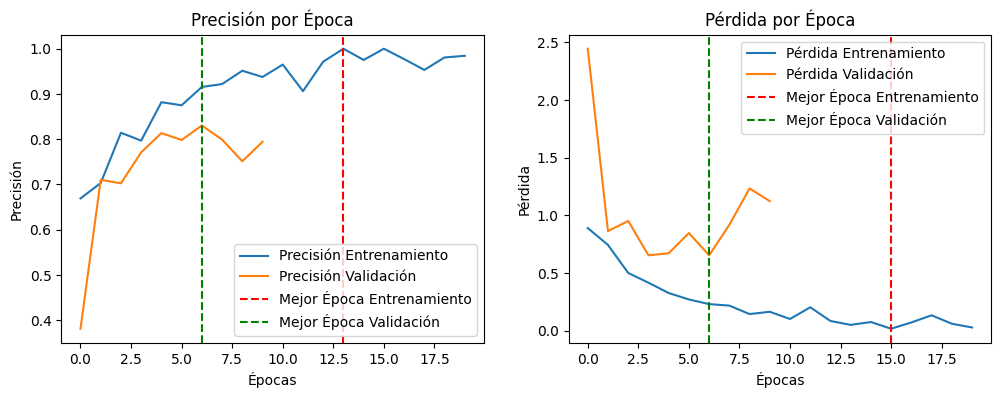

In [9]:
# Calcular la mejor época de entrenamiento y validación en base a la precisión
mejor_epoca_precision_entrenamiento = history.history['accuracy'].index(max(history.history['accuracy'])) + 1
mejor_epoca_precision_validacion = history.history['val_accuracy'].index(max(history.history['val_accuracy'])) + 1

# Calcular la mejor época de entrenamiento y validación en base a la pérdida
mejor_epoca_perdida_entrenamiento = history.history['loss'].index(min(history.history['loss'])) + 1
mejor_epoca_perdida_validacion = history.history['val_loss'].index(min(history.history['val_loss'])) + 1

# Mostrar los resultados
print('Mejor época de entrenamiento en base a la precisión: ', mejor_epoca_precision_entrenamiento-1)
print('Precisión: ', history.history['accuracy'][mejor_epoca_precision_entrenamiento-1])
print('Mejor época de validación en base a la precisión: ', mejor_epoca_precision_validacion-1)
print('Precisión: ', history.history['val_accuracy'][mejor_epoca_precision_validacion-1])
print('Mejor época de entrenamiento en base a la pérdida: ', mejor_epoca_perdida_entrenamiento-1)
print('Pérdida: ', history.history['loss'][mejor_epoca_perdida_entrenamiento-1])
print('Mejor época de validación en base a la pérdida: ', mejor_epoca_perdida_validacion-1)
print('Pérdida: ', history.history['val_loss'][mejor_epoca_perdida_validacion-1])

# Graficar precisión
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión Validación')
plt.axvline(x=mejor_epoca_precision_entrenamiento-1, color='r', linestyle='--', label='Mejor Época Entrenamiento')
plt.axvline(x=mejor_epoca_precision_validacion-1, color='g', linestyle='--', label='Mejor Época Validación')
plt.title('Precisión por Época')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Graficar pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida Validación')
plt.axvline(x=mejor_epoca_perdida_entrenamiento-1, color='r', linestyle='--', label='Mejor Época Entrenamiento')
plt.axvline(x=mejor_epoca_perdida_validacion-1, color='g', linestyle='--', label='Mejor Época Validación')
plt.title('Pérdida por Época')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

In [10]:
# Detalles del modelo entrenado
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 46, 46, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 21, 21, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,434,958 (13.10 MB)

 Trainable params: 1,144,836 (4.37 MB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 2,289,674 (8.73 MB)

In [11]:
# Detalle de precisión y pérdida del modelo
precision_entrenamiento = model.evaluate(data_entrenamiento)
precision_validacion = model.evaluate(data_validacion)

print('Precisión en entrenamiento: ', precision_entrenamiento[1])
print('Pérdida en entrenamiento: ', precision_entrenamiento[0])

print('Precisión en validación: ', precision_validacion[1])
print('Pérdida en validación: ', precision_validacion[0])

320/320 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.9367 - loss: 0.1749
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.8242 - loss: 0.6964
Precisión en entrenamiento:  0.9383059740066528
Pérdida en entrenamiento:  0.17532852292060852
Precisión en validación:  0.830273449420929
Pérdida en validación:  0.6530714631080627


In [12]:
# Imprimir los pesos del modelo entrenado
pesos = model.get_weights()
print('Pesos: ', pesos)

Pesos:  [array([[[[ 2.94820219e-02,  4.63175289e-02, -4.41694856e-02,
          -3.52501348e-02, -1.09353542e-01, -7.19608739e-02,
          -6.13103546e-02, -1.57407761e-01, -4.49167117e-02,
          -1.01431146e-01, -4.42826748e-02, -6.20303079e-02,
          -1.48228347e-01, -9.36049782e-03,  1.08735919e-01,
          -1.00637987e-01, -1.15313560e-01, -8.69058818e-02,
           7.61030475e-03, -1.07973278e-01,  5.74962571e-02,
          -1.10270366e-01, -1.58005152e-02,  1.82340238e-02,
           8.24054554e-02, -1.05528787e-01, -9.52158123e-02,
          -7.08722174e-02, -1.23553844e-02,  1.02974372e-02,
          -1.32607684e-01, -4.72508147e-02],
         [ 5.70933148e-02,  8.69548470e-02,  1.10433199e-01,
           1.05178356e-01,  9.76773128e-02, -1.03750927e-02,
           1.18966125e-01, -7.79479891e-02,  1.43363923e-01,
          -5.85201047e-02, -6.30807728e-02, -4.69710454e-02,
          -6.20213449e-02, -1.62145406e-01,  7.76268169e-02,
          -1.65863097e-01, -1.2

### Resultado
El modelo alcanzó una precisión de 93.8% y una pérdida de 17.5% en la fase de entrenamiento, y una precisión de 83% y una pérdida 65,3% en la fase de validación, lo que aún representa una alta pérdida en la validación. A pesar de ello, se procede a guardar los resultados del modelo para realización de pruebas. Esto se puede deber a un sobreajuste o a que los hiperparámetros no están ajustados correctamente, así que en los próximos modelos se buscará revisar estos puntos.

In [13]:
# Guardado del modelo
model.save(r'C:\Users\carolina\Documents\Proyectos_programacion\SIRA\backend\models\sira_modelo5.h5')

# Guardado del modelo en el formato nativo de Keras
model.save(r'C:\Users\carolina\Documents\Proyectos_programacion\SIRA\backend\models\sira_modelo5.keras')

In [14]:
# Guardado del modelo en el formato de TensorFlow a partir del modelo de Keras ya guardado
model = tf.keras.models.load_model(r'C:\Users\carolina\Documents\Proyectos_programacion\SIRA\backend\models\sira_modelo5.h5')

# Convertir el modelo a TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Guardar el modelo convertido
with open(r'C:\Users\carolina\Documents\Proyectos_programacion\SIRA\backend\models\sira_modelo5.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\carolina\AppData\Local\Temp\tmp8fvpsu39\assets


INFO:tensorflow:Assets written to: C:\Users\carolina\AppData\Local\Temp\tmp8fvpsu39\assets


Saved artifact at 'C:\Users\carolina\AppData\Local\Temp\tmp8fvpsu39'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 48, 48, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  2501834038096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2501867643792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2501867649552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2501867644176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2501867638224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2501867645136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2501867643984: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2501867646672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2501918918416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2501918919184: TensorSpec(shape=(), dtype=tf.resource, name=None)
  25018